In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.float_format', '{:,.0f}'.format)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../data/cleaned_data.csv')

df['date'] = pd.to_datetime(df['date'])
df.head()

,date,store_nbr,family,sales,onpromotion,holiday_type,locale,transferred,dcoilwtico,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week,is_crisis,sales_lag_7,rolling_mean_7,is_weekend,is_holiday,promo_last_7_days
0,2013-01-01,1,AUTOMOTIVE,0,0,Holiday,National,False,93,Quito,Pichincha,D,13,0,2013,1,1,1,Tuesday,0,0,0,0,1,0
1,2013-01-01,1,BABY CARE,0,0,Holiday,National,False,93,Quito,Pichincha,D,13,0,2013,1,1,1,Tuesday,0,0,0,0,1,0
2,2013-01-01,1,BEAUTY,0,0,Holiday,National,False,93,Quito,Pichincha,D,13,0,2013,1,1,1,Tuesday,0,0,0,0,1,0
3,2013-01-01,1,BEVERAGES,0,0,Holiday,National,False,93,Quito,Pichincha,D,13,0,2013,1,1,1,Tuesday,0,0,0,0,1,0
4,2013-01-01,1,BOOKS,0,0,Holiday,National,False,93,Quito,Pichincha,D,13,0,2013,1,1,1,Tuesday,0,0,0,0,1,0


## 🔍 Question 1: How Have Total Sales Evolved Over Time?

In [3]:
sales_over_time = df.groupby('date')['sales'].sum().reset_index()
fig = px.line(sales_over_time, x='date', y='sales', title="Total Sales Over Time")
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Sales",
    template="plotly",
    title_x=0.5
)
fig.write_html("../visualizations/interactive/sales_over_time.html")
fig.show()

## 🔍 2. Which products or categories contribute the most to total revenue?

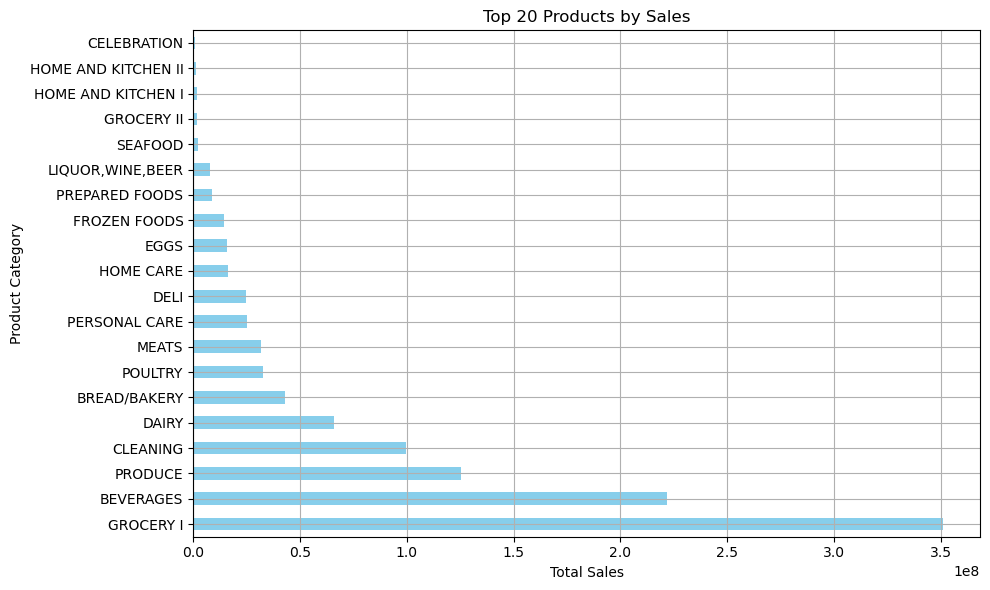

In [4]:
top_products = df.groupby('family')['sales'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
top_products.plot(kind='barh', color='skyblue')
plt.title('Top 20 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.grid(True)
plt.tight_layout()

plt.savefig('../visualizations/static/top_20_products_by_sales.png')

plt.show()

## 🔍 3. Which stores, cities, or states are the top performers in terms of revenue?

1. **Top Stores by Revenue**

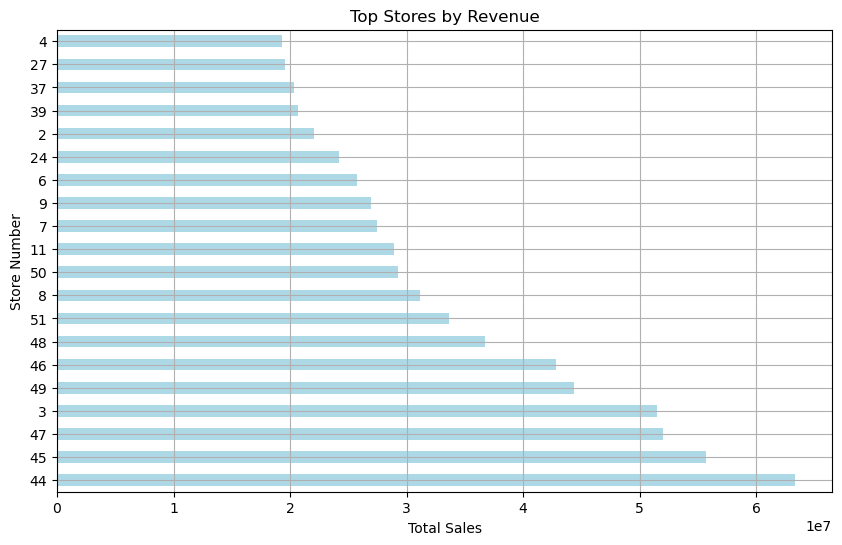

In [5]:
top_stores = df.groupby('store_nbr')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
top_stores.head(20).plot(kind='barh', color='lightblue')
plt.title('Top Stores by Revenue')
plt.xlabel('Total Sales')
plt.ylabel('Store Number')
plt.grid(True)

plt.savefig('../visualizations/static/top_stores_by_sales.png')
plt.show()

2. **Top Cities by Revenue**

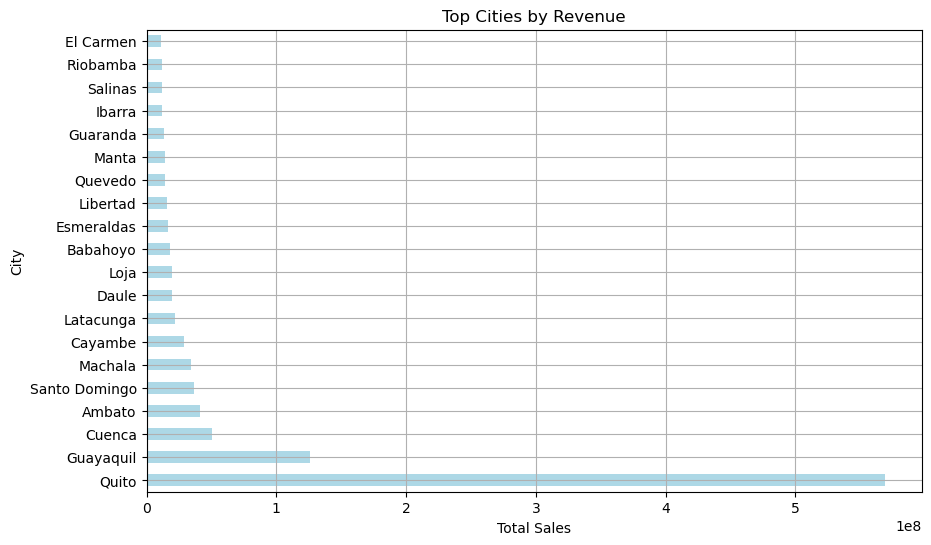

In [6]:
top_cities = df.groupby('city')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
top_cities.head(20).plot(kind='barh', color='lightblue')
plt.title('Top Cities by Revenue')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.grid(True)

plt.savefig('../visualizations/static/top_cities_by_sales.png')
plt.show()

3. **Top States by Revenue**

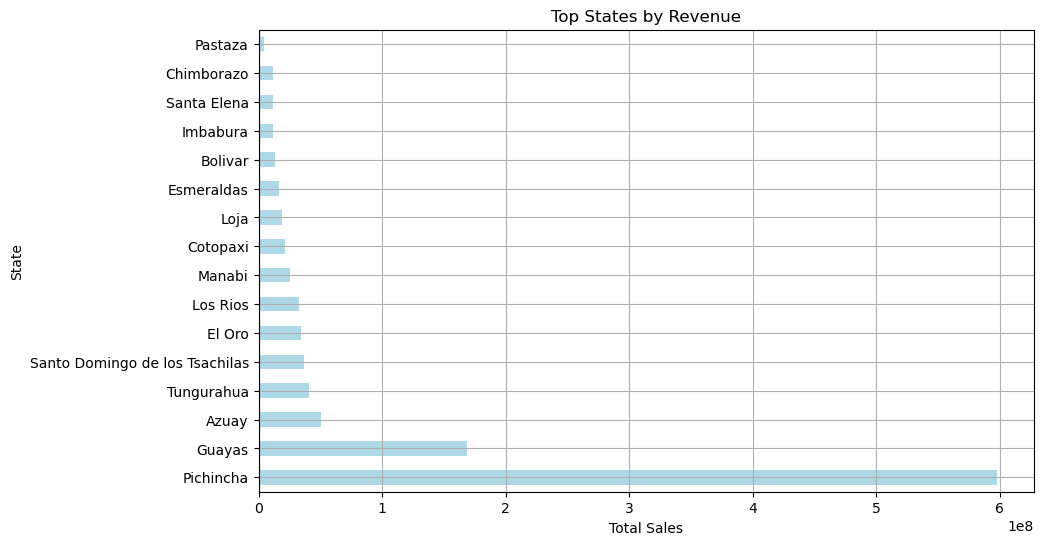

In [7]:
top_regions = df.groupby('state')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
top_regions.head(20).plot(kind='barh', color='lightblue')
plt.title('Top States by Revenue')
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.grid(True)

plt.savefig('../visualizations/static/top_states_by_sales.png')
plt.show()

### 4-What is the average order size across stores, regions, and categories?

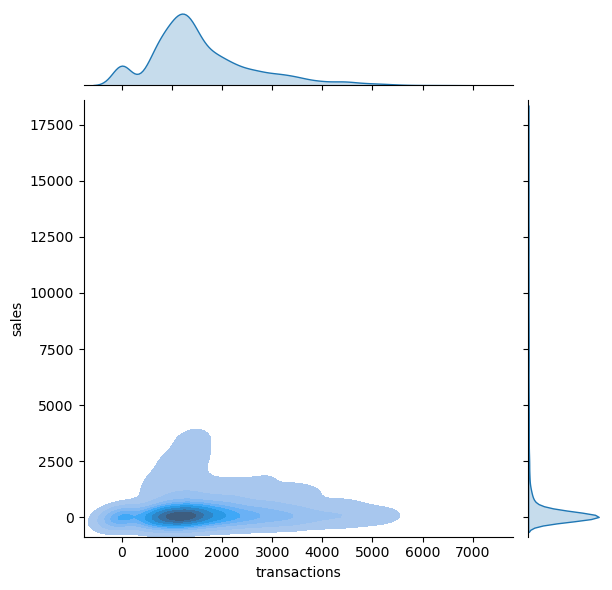

In [ ]:
sample_df = df.sample(n=5000, random_state=42)  # adjust n based on your machine

# KDE JointPlot on sampled data
sns.jointplot(
    x="transactions",
    y="sales",
    data=sample_df,
    kind="kde",
    fill=True
)


### What are the trends in sales per day of the week?


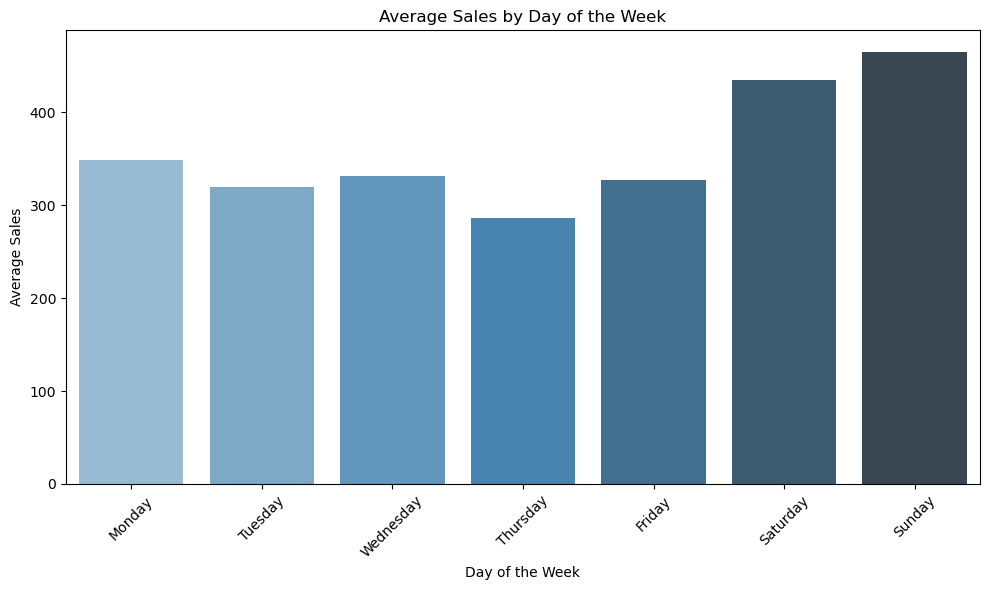

In [9]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_sales_by_day = df.groupby('day_of_week')['sales'].mean().reindex(day_order)
plt.figure(figsize=(10, 6))
sns.barplot(
    x=avg_sales_by_day.index,
    y=avg_sales_by_day.values,
    palette="Blues_d"
)

plt.title("Average Sales by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### What are the trends in sales per week?

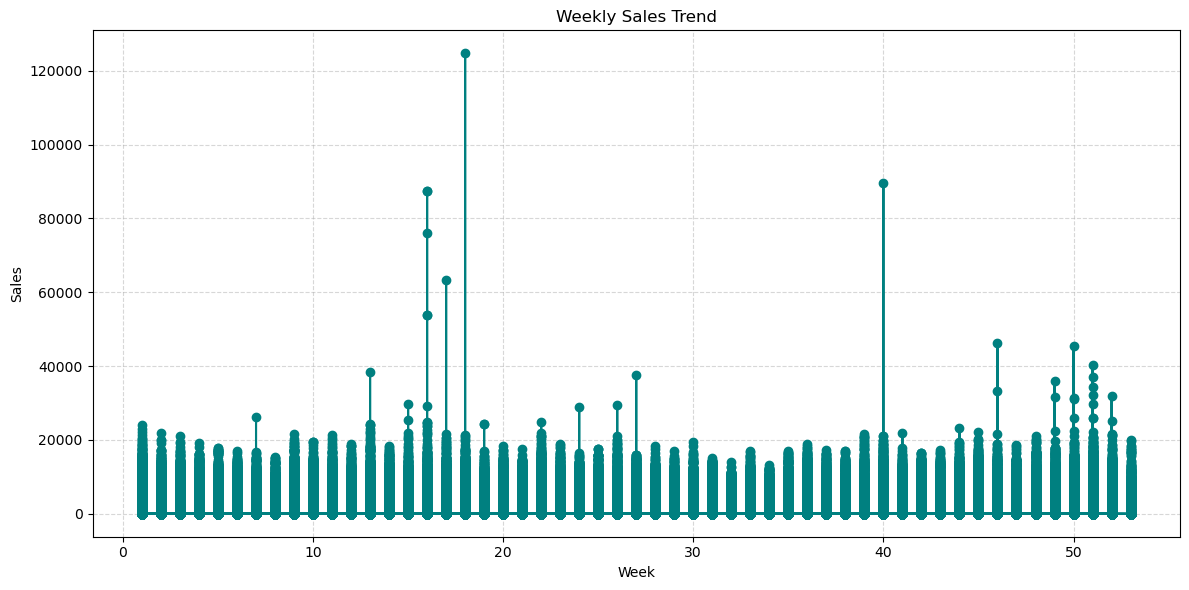

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df['week'], df['sales'], marker='o', linestyle='-', color='teal')

plt.title('Weekly Sales Trend')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [11]:
zero_sales_weeks = df[df['sales'] > 10000]
zero_sales_weeks

,date,store_nbr,family,sales,onpromotion,holiday_type,locale,transferred,dcoilwtico,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week,is_crisis,sales_lag_7,rolling_mean_7,is_weekend,is_holiday,promo_last_7_days
3048,2013-01-02,44,GROCERY I,"10,686",0,Normal Day,NaN,False,93,Quito,Pichincha,A,5,"4,821",2013,1,1,1,Wednesday,0,0,0,0,0,0
3081,2013-01-02,45,GROCERY I,"11,422",0,Normal Day,NaN,False,93,Quito,Pichincha,A,11,"4,208",2013,1,1,1,Wednesday,0,0,0,0,0,0
3114,2013-01-02,46,GROCERY I,"10,892",0,Normal Day,NaN,False,93,Quito,Pichincha,A,14,"4,886",2013,1,1,1,Wednesday,0,0,0,0,0,0
3147,2013-01-02,47,GROCERY I,"10,867",0,Normal Day,NaN,False,93,Quito,Pichincha,A,14,"4,161",2013,1,1,1,Wednesday,0,0,0,0,0,0
8394,2013-01-05,44,GROCERY I,"10,699",0,Work Day,National,False,93,Quito,Pichincha,A,5,"4,921",2013,1,1,1,Saturday,0,0,"1,962",1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3050292,2017-08-13,45,BEVERAGES,"10,671",14,Normal Day,NaN,False,50,Quito,Pichincha,A,11,"4,054",2017,8,32,3,Sunday,0,"12,609","2,694",1,0,38
3050301,2017-08-13,45,GROCERY I,"12,723",38,Normal Day,NaN,False,50,Quito,Pichincha,A,11,"4,054",2017,8,32,3,Sunday,0,"15,190","2,311",1,0,92
3050334,2017-08-13,46,GROCERY I,"10,557",40,Normal Day,NaN,False,50,Quito,Pichincha,A,14,"3,839",2017,8,32,3,Sunday,0,"14,233","2,036",1,0,94
3050358,2017-08-13,47,BEVERAGES,"10,279",9,Normal Day,NaN,False,50,Quito,Pichincha,A,14,"3,741",2017,8,32,3,Sunday,0,"12,295","1,632",1,0,37


### What are the trends in sales per month?

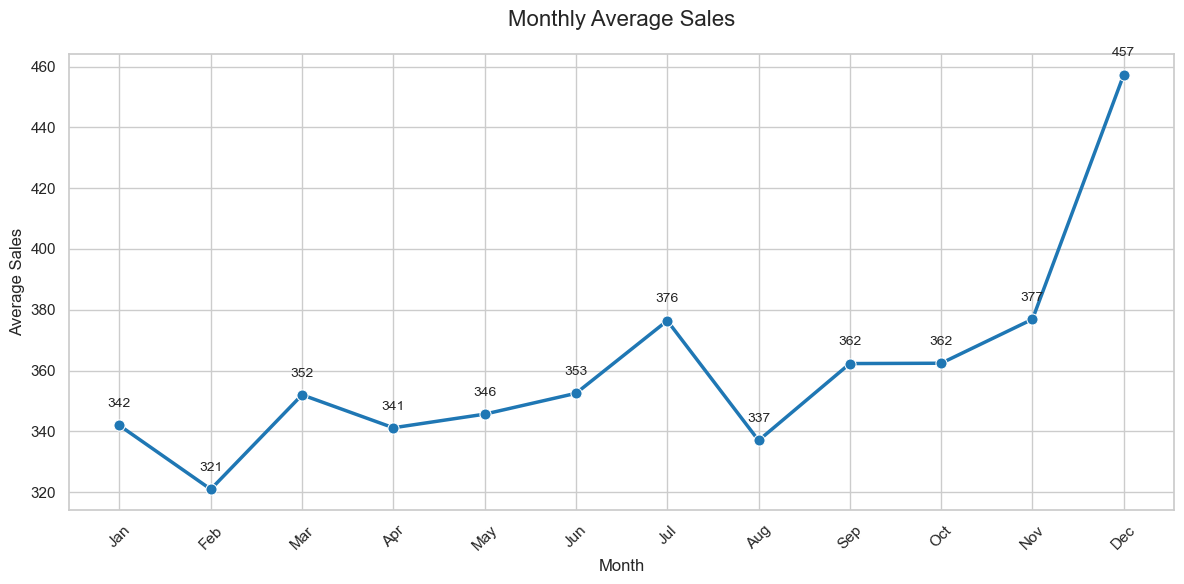

In [12]:
monthly_avg = df.groupby('month')['sales'].mean()

# Assuming monthly_avg is your Series: month -> avg sales
# Convert it to a proper DataFrame
monthly_data = pd.DataFrame({
    'month': monthly_avg.index,
    'avg_sales': monthly_avg.values
})

# Convert month numbers to names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_data['month_name'] = monthly_data['month'].map(lambda x: month_names[x-1])

# Create the plot
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

# Create ordered categorical for proper month ordering
monthly_data['month_name'] = pd.Categorical(
    monthly_data['month_name'],
    categories=month_names,
    ordered=True
)

# Line plot with markers
ax = sns.lineplot(
    data=monthly_data,
    x='month_name',
    y='avg_sales',
    marker='o',
    linewidth=2.5,
    markersize=8,
    color='#1f77b4'
)

# Customize the plot
ax.set_title('Monthly Average Sales', fontsize=16, pad=20)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Average Sales', fontsize=12)
plt.xticks(rotation=45)

# Add value labels
for i, row in monthly_data.iterrows():
    ax.text(
        i,
        row['avg_sales'] + 5,
        f"{row['avg_sales']:.0f}",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()

### What are the trends in sales per quarter?

<Figure size 1000x800 with 0 Axes>

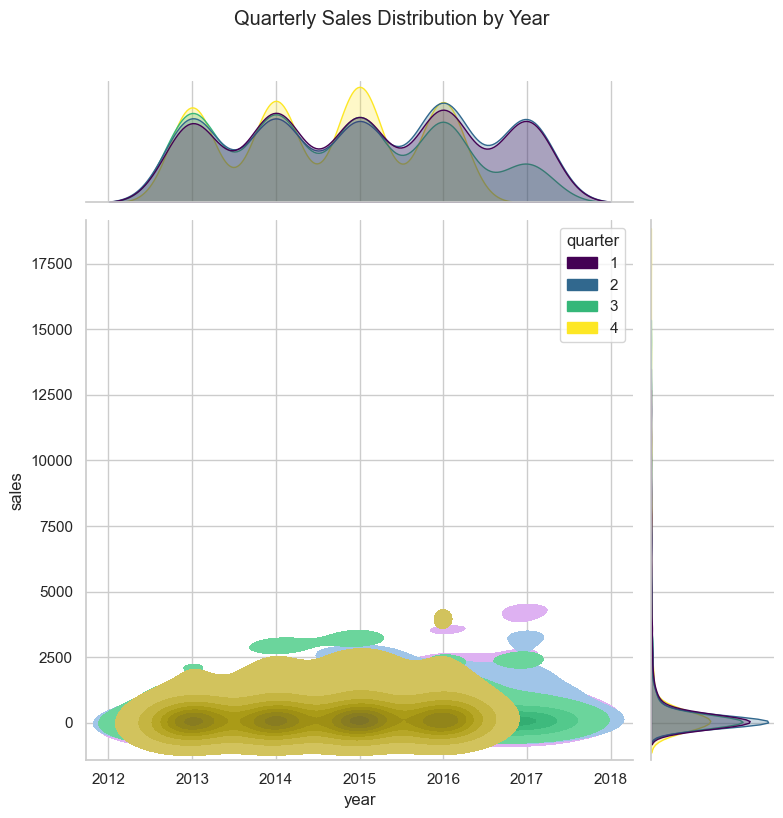

In [13]:
plt.figure(figsize=(10, 8))
sns.jointplot(
    x="year",
    y="sales",
    hue="quarter", 
    data=sample_df,
    kind="kde",
    palette="viridis",
    fill=True,
    height=8,
    ratio=4
)
plt.suptitle("Quarterly Sales Distribution by Year", y=1.02)
plt.tight_layout()

## ⏳ 6. How do sales differ on weekdays versus weekends?

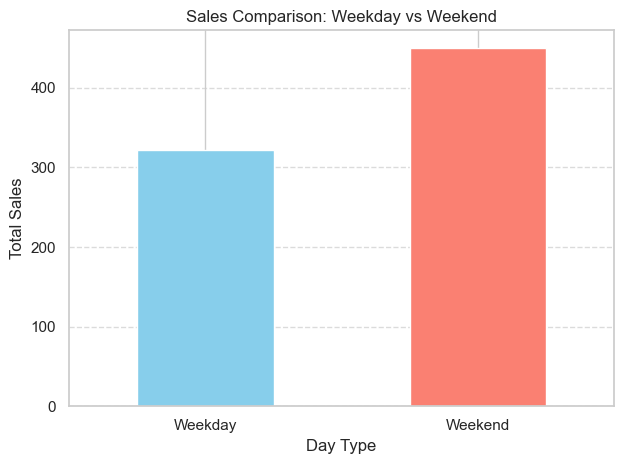

In [14]:
sales_comparison = df.groupby('is_weekend')['sales'].agg(['sum', 'mean', 'count']).rename(index={True: 'Weekend', False: 'Weekday'})

sales_comparison['mean'].plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Sales Comparison: Weekday vs Weekend')
plt.xlabel('Day Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## ⏳ 7. Are sales peaking during certain months, holidays, or quarters of the year?

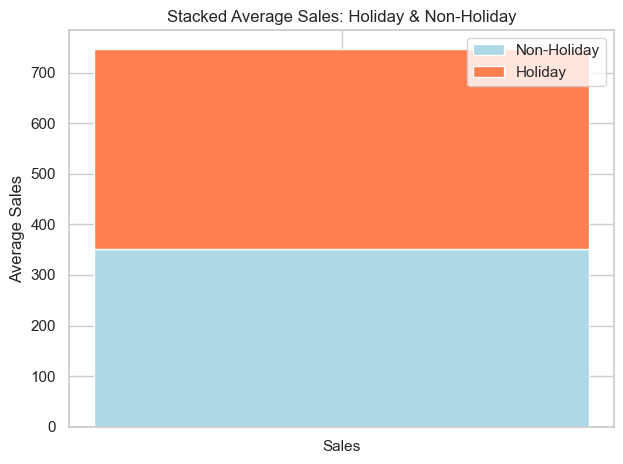

In [15]:
holiday_sales = df.groupby('is_holiday')['sales'].mean()
holiday_sales.index = ['Non-Holiday', 'Holiday']
plt.bar('Sales', holiday_sales['Non-Holiday'], label='Non-Holiday', color='lightblue')
plt.bar('Sales', holiday_sales['Holiday'], bottom=holiday_sales['Non-Holiday'], label='Holiday', color='coral')

plt.title('Stacked Average Sales: Holiday & Non-Holiday')
plt.ylabel('Average Sales')
plt.legend()
plt.tight_layout()
plt.show()


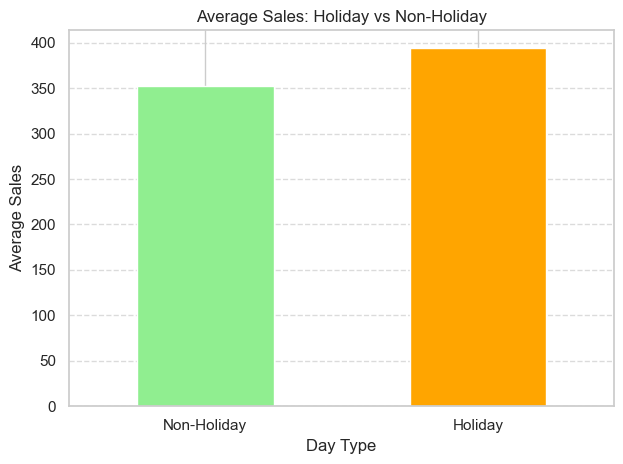

In [16]:
holiday_sales.plot(kind='bar', color=['lightgreen', 'orange'])

plt.title('Average Sales: Holiday vs Non-Holiday')
plt.xlabel('Day Type')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 4. Specific Holidays 

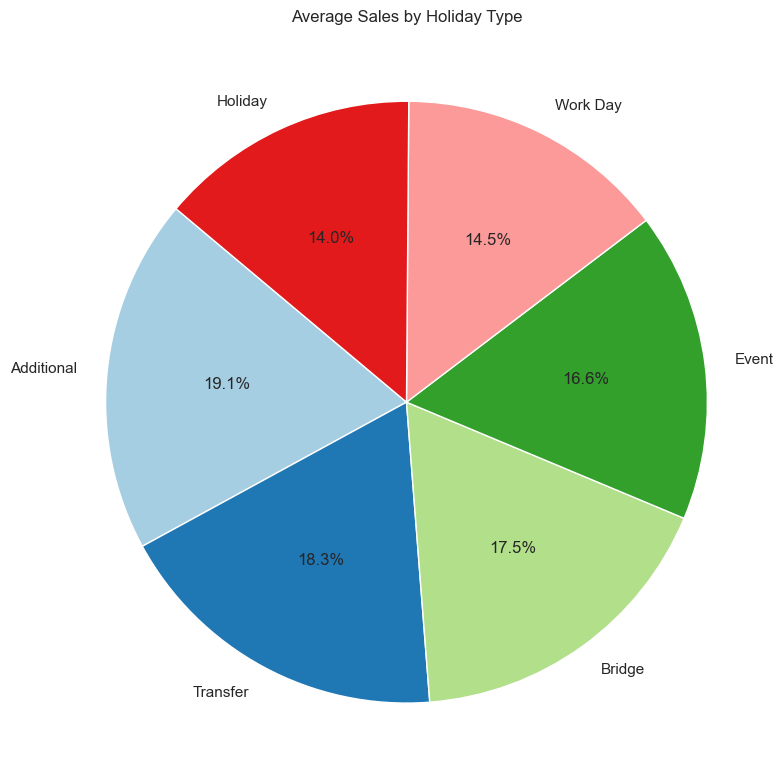

In [17]:

specific_holidays = df[df['is_holiday'] == 1].groupby('holiday_type')['sales'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 8))
plt.pie(specific_holidays, labels=specific_holidays.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Average Sales by Holiday Type')
plt.axis('equal')  
plt.tight_layout()
plt.show()


## 💸 9. What impact do promotions have on sales volume?

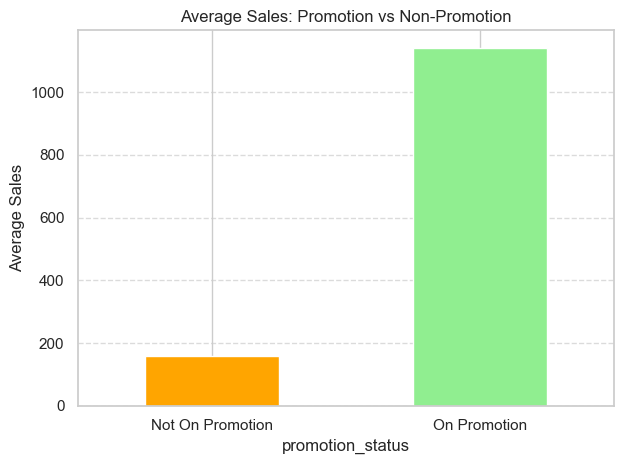

In [18]:

df['promotion_status'] = df['onpromotion'].apply(lambda x: 'On Promotion' if x > 0 else 'Not On Promotion')

promo_sales = df.groupby('promotion_status')['sales'].mean()

promo_sales.plot(kind='bar', color=['orange', 'lightgreen'])

plt.title('Average Sales: Promotion vs Non-Promotion')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 💸 10. Is there a cumulative effect of promotions (e.g., last 7 days of promo)?

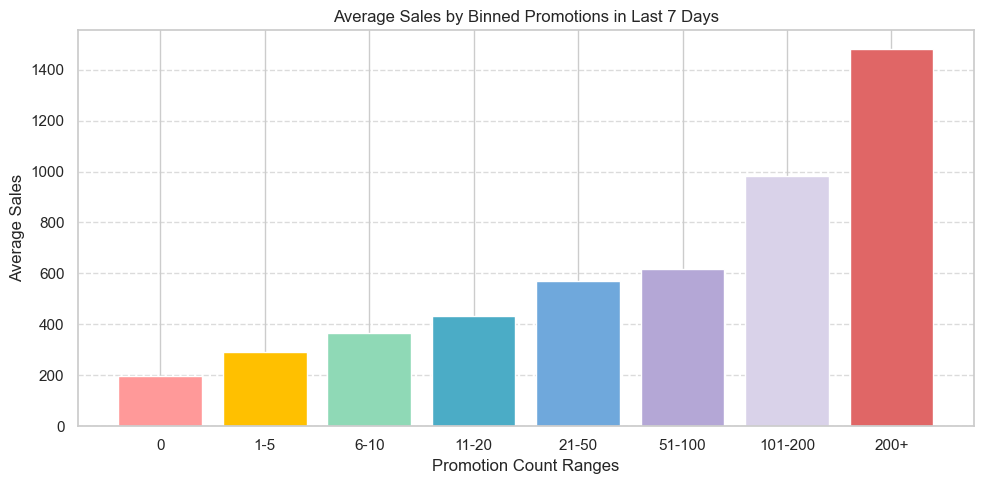

In [19]:
bins = [0, 1, 5, 10, 20, 50, 100, 200, df['promo_last_7_days'].max()]
labels = ['0', '1-5', '6-10', '11-20', '21-50', '51-100', '101-200', '200+']

df['promo_bin'] = pd.cut(df['promo_last_7_days'], bins=bins, labels=labels, right=False)
binned_avg_sales = df.groupby('promo_bin')['sales'].mean().reset_index()
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#4bacc6', '#6fa8dc', '#b4a7d6', '#d9d2e9', '#e06666']

# Plot
plt.figure(figsize=(10, 5))
plt.bar(binned_avg_sales['promo_bin'], binned_avg_sales['sales'], color=colors)

plt.title('Average Sales by Binned Promotions in Last 7 Days')
plt.xlabel('Promotion Count Ranges')
plt.ylabel('Average Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
